# Homework 2
## Name: 常鑫磊 
## ID:1801212779

# Problem 1

### 1. Implement a function closed_form_1 that computes this closed form solution given the features 𝐗, labels Y (using Python or Matlab).


In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [382]:
df_1 = pd.read_csv("climate_change_1.csv",header = 0)
df_2 = pd.read_csv("climate_change_2.csv",header = 0)
training_set = df_1[df_1.Year<=2006]
testing_set = df_1[df_1.Year>2006]

In [383]:
n_samples = len(training_set)
Y=training_set.values[:,-1]
constant = np.ones(n_samples)
X=np.insert(training_set.values[:,2:-1],0,constant,axis=1)

In [384]:
def closed_form_1(x,y):
    beta = np.linalg.inv(x.T@x)@x.T@y
    return beta

beta = closed_form_1(X,Y)
print("the coefficient of OLS closed form solution:\n",beta)

the coefficient of OLS closed form solution:
 [-1.24594261e+02  6.42053134e-02  6.45735927e-03  1.24041896e-04
 -1.65280033e-02 -6.63048889e-03  3.80810324e-03  9.31410838e-02
 -1.53761324e+00]


### 2.Write down the mathematical formula for the linear model and evaluate the model R2 on the training set and the testing set.
The mathematical formula for the linear model is
* $$y=X\beta+\epsilon$$

The formula of $R^2$ is
* $$R^2 = \frac{\Sigma_i(\hat y_i-\bar y_i)^2}{\Sigma_i(y_i-\bar y_i)^2}$$

In [385]:
def R_squared(x,y,beta):
    SSR = np.sum((x@beta-y.mean())**2)
    SST = np.sum((y-y.mean())**2)
    return SSR/SST

R_squared(X,Y,closed_form_1(X,Y))

0.7508932772525232

In [386]:
n_samples = len(testing_set)
Y_test=testing_set.values[:,-1]
constant = np.ones(n_samples)
X_test=np.insert(testing_set.values[:,2:-1],0,constant,axis=1)

R_squared(X_test,Y_test,closed_form_1(X,Y))

print("R_squared of training_data is", R_squared(X,Y,closed_form_1(X,Y)))
print("R_squared of testing_data is", R_squared(X_test,Y_test,closed_form_1(X,Y)))


R_squared of training_data is 0.7508932772525232
R_squared of testing_data is 0.22517701503585116


### 3.Which variables are significant in the model?

In [387]:
def t_test(x,y):
    sum_error = (y-x@closed_form_1(x,y)).T@(y-x@closed_form_1(x,y))
    n = np.shape(x)[0]
    k = np.shape(x)[1]
    var_beta = sum_error/(n-k)*np.diag(np.linalg.inv(X.T@X))
    t = closed_form_1(x,y)/np.sqrt(var_beta)
    return t

In [388]:
t_test(X,Y)

array([-6.26517396,  9.923226  ,  2.8264197 ,  0.2404694 , -1.92972604,
       -4.07783387,  3.75729271,  6.31256095, -7.21030085])

In [389]:
np.abs(t_test(X,Y))>2

array([ True,  True,  True, False, False,  True,  True,  True,  True])

In [390]:
print("MEI,C02,CFC-11,CFC-12,TSI and Aerosols are significant variables")

MEI,C02,CFC-11,CFC-12,TSI and Aerosols are significant variables


### 4. Write down the necessary conditions for using the closed form solution. And you can apply it to the dataset climate_change_2.csv, explain the solution is unreasonable.
Necessary conditions: $(XX')^{-1} existed$

In data set 2, the covariance matrix shows the correlation coefficient between CO2 and N2O, CFC-12 and CH4 is pretty high, which result multicolinearity. So, the analytical solution is sensetive to the original value and unreasonable for data set 2.

In [391]:
df_2.loc[:,"MEI":"NO"].corr()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO
MEI,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,-0.105555
CO2,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.872253
CH4,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,1.000000
N2O,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.894409
CFC-11,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.713504
CFC-12,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.958237
TSI,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.146335
Aerosols,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.290381
NO,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,1.000000


# Problem2

### 1. Please write down the loss function for linear model with L1 regularization, L2 regularization, respectively.
* The loss function with $L_1$ regularization $$L=(Y-X\beta)'(Y-X\beta)+\lambda||\beta||_1$$
* The loss function with $L_2$ regularization $$L=(Y-X\beta)'(Y-X\beta)+\lambda ||\beta||_2^2$$


### 2.The closed form solution for linear model with L2 regularization:
$$\theta = (X^TX+\lambda I)^{-1}X^TY$$ 
### where I is the identity matrix. Write a function closed_form_2 that computes this closed form solution given the features X, labels Y and the regularization parameter $\lambda$

In [392]:
def closed_form_2(x,y,lam):
    lam_mat = lam*np.eye(x.shape[1])
    lam_mat[0,0] = 0
    beta = np.linalg.inv(x.T@x+lam_mat)@x.T@y
    return beta

closed_form_2(X,Y,10)


array([-8.08439685e+01,  4.48393633e-02,  8.41756269e-03,  2.58313240e-04,
       -1.76472998e-02, -6.80438552e-03,  3.74782755e-03,  6.07197938e-02,
       -2.68981314e-02])

### 3.Compare the two solutions in problem 1 and problem 2 and explain the reason why linear model with L2 regularization is robust. (using climate_change_1.csv)

In [393]:
beta_L2 = closed_form_2(X,Y,10)
beta = closed_form_2(X,Y,0)

print("L2 coeffcient:",beta_L2)
print("no punishment coefficient:",beta)

L2 coeffcient: [-8.08439685e+01  4.48393633e-02  8.41756269e-03  2.58313240e-04
 -1.76472998e-02 -6.80438552e-03  3.74782755e-03  6.07197938e-02
 -2.68981314e-02]
no punishment coefficient: [-1.24594261e+02  6.42053134e-02  6.45735927e-03  1.24041896e-04
 -1.65280033e-02 -6.63048889e-03  3.80810324e-03  9.31410838e-02
 -1.53761324e+00]


We can see under L2 regularization, most of coefficient are shrinked compared to the no regularization formula, which can prevent overfiting, thus the linear model with L2 regularization is robust

### 4. You can change the regularization parameter λ to get different solutions for this problem. Suppose we set λ = 10, 1, 0.1, 0.01, 0.001, and please evaluate the model R2 on the training set and the testing set. Finally, please decide the best regularization parameter $\lambda$.

In [394]:
lam_list = [0, 0.01, 0.1, 1, 10, 20]
R2_training, R2_testing = [], []
for each in lam_list:
    theta = closed_form_2(X, Y, lam=each)
    R2_training.append(R_squared(X,Y,theta))
    R2_testing.append(R_squared(X_test,Y_test,theta))

pd.DataFrame([R2_training, R2_testing], index=["R_squared traning", "R_squared testing"], columns=lam_list)

,0.00,0.01,0.10,1.00,10.00,20.00
R_squared traning,0.750893,0.746158,0.723403,0.703035,0.689331,0.680339
R_squared testing,0.225177,0.229220,0.267028,0.390934,0.550321,0.660820


In [395]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
kf = KFold(n_splits=5)

X = training_set.loc[:, "MEI":"Aerosols"].values
X = np.insert(X,0,np.ones(X.shape[0]),axis=1)
y = training_set["Temp"].values


lam_list = [0, 0.001, 0.01, 0.1, 1, 10, 20]
MSE_training = []
MSE_validation = []
MSE_test = []
for each in lam_list:
    MSE_training_here = 0 
    MSE_validation_here = 0 
    MSE_test_here = 0
    for train_index, test_index in kf.split(y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        theta = closed_form_2(X_train, y_train, lam=each)
        y_predict = X_train @ theta
        MSE_training_here += mean_squared_error(y_train, y_predict)
        y_predict = X_test @ theta
        MSE_validation_here += mean_squared_error(y_test, y_predict)
        MSE_test_here += mean_squared_error(testing_set["Temp"].values, testing_set.loc[:, "MEI":"Aerosols"].values @ theta[1:] + theta[0])
    
    MSE_training.append(MSE_training_here / 5)
    MSE_validation.append(MSE_validation_here / 5)
    MSE_test.append(MSE_test_here / 5)
    

In [396]:
pd.DataFrame([MSE_training, MSE_validation, MSE_test], index=["MSE_training", "MSE_validation","MSE_test"], columns=lam_list)

,0.000,0.001,0.010,0.100,1.000,10.000,20.000
MSE_training,0.007691,0.007691,0.007701,0.007953,0.008744,0.009084,0.009192
MSE_validation,0.024045,0.024108,0.024790,0.031237,0.041702,0.041028,0.038466
MSE_test,0.009956,0.009947,0.009884,0.009986,0.011963,0.015869,0.018576


Hence $\lambda$ = 0.01 is best

# Problem3

### 1. From Problem 1, you can know which variables are significant, therefore you can use less variables to train model. For example, remove highly correlated and redundant features. You can propose a workflow to select feature.

1. Remove the highly correlated variable first.
2. Run regression, remove the insignificant variables step by step

# Problem 4

**Gradient descent algorithm is an iterative process that takes us to the minimum of a function. Please write down the iterative expression for updating the solution of linear model and implement it using Python or Matlab in gradientDescent function.**
* Batch based gradient descent iterative formula is$$\beta_n = \beta_{n-1} -\frac{\alpha}{m} X'(X\beta -y)$$


In [397]:
from sklearn import preprocessing

train_data = df_1.loc[:2006,:]

def loss(coeff,x,y):
    return (x@coeff-y).T@(x@coeff-y)

def gradientDescent(x,y,iter_max=200000, batch=100,alpha=1e-5,
                     min_gap=1e-1,constant=True):
    record = []
    if constant:
        x["Constant"]=1
    columns = x.columns
    x = np.matrix(x)
    y = np.matrix(y).T
    coeff = np.matrix(np.arange(x.shape[1])/x.shape[1]).T

    for i in range(iter_max):
        idx = np.random.choice(x.shape[0],batch)
        x_batch = x[idx,:]
        y_batch = y[idx,:]
        iteration = alpha/batch*(x_batch.T@(x_batch@coeff-y_batch))
        if np.abs(iteration.A1).all() < min_gap:
            print("iteration terminal at %s times"%i)
            break
        else:
            coeff = coeff - iteration
            record.append(loss(coeff,x,y)[0,0])
            
    plt.plot(record, label = "loss_function")
    plt.ylabel("total_loss")
    plt.xlabel("iter_times")
    plt.legend()
    plt.show()
    
    print("The final loss is ", record[-1])
    result = pd.Series(coeff.A1, index=columns, name="correlation coefficient")
    return result



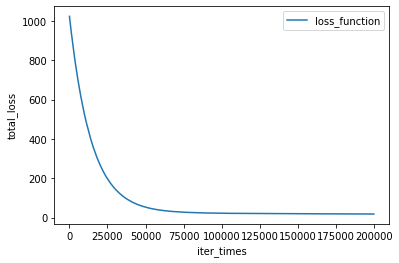

The final loss is  18.969582382654266


MEI        -0.218154
CO2        -0.093951
CH4        -0.102856
N2O         0.131874
CFC-11      0.014836
CFC-12      0.167336
TSI         0.435553
Aerosols    0.649525
Constant    0.337525
Name: correlation coefficient, dtype: float64

In [398]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_train = min_max_scaler.fit_transform(train_data.iloc[:,2:].values)
scaled_train = pd.DataFrame(scaled_train, columns = train_data.columns[2:])
result = gradientDescent(scaled_train.iloc[:,:-1], scaled_train.Temp)
result